In [69]:
import h5py
import matplotlib.pyplot as plt
import numpy as np
import shdom
from mpl_toolkits.mplot3d import Axes3D

data_dir = '../AirMSPI/AirMSPI_ER2_GRP_ELLIPSOID_20130206_Pacific-32N123W'

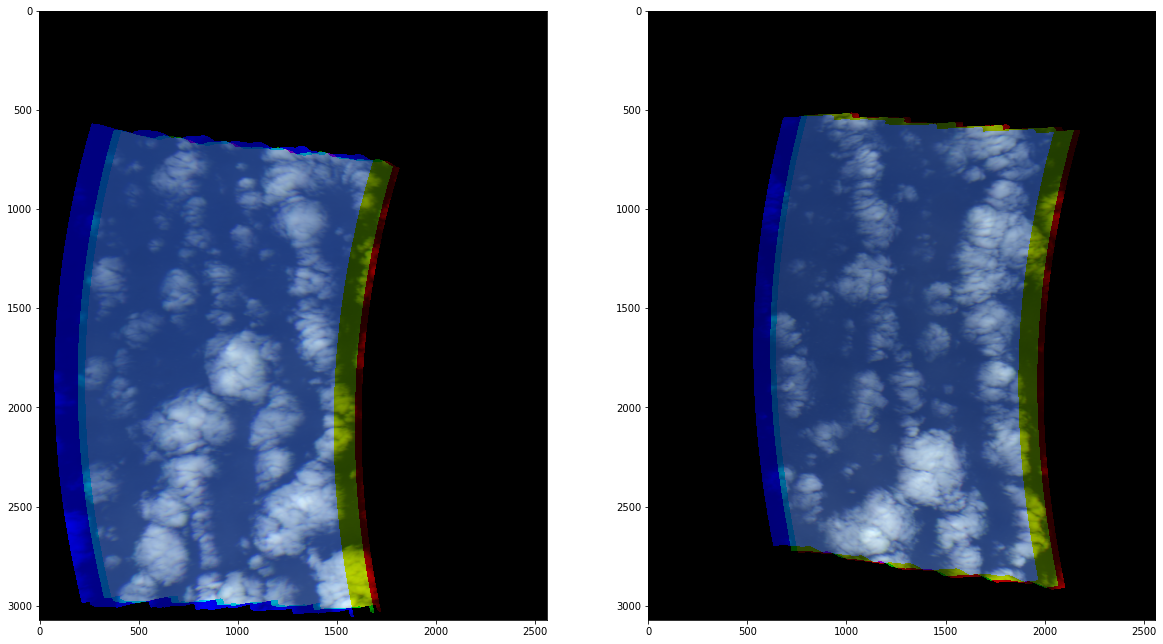

In [70]:
shdom.AirMSPIMeasurementsv3().imshow(data_dir)

In [71]:
# roi = []

In [72]:
%matplotlib notebook 
# for i in range(i,9):
#     roi.append(shdom.AirMSPIMeasurementsv3().select_region_of_interest(data_dir,i))

In [73]:
# print(roi)

In [74]:
roi = [[1552, 2072, 780, 1288], [1644, 2108, 864, 1308], [1696, 2176, 916, 1376], [1740, 2196, 936, 1400], [1840, 2108, 1040, 1432], [1884, 2160, 1064, 1500], [1944, 2316, 1116, 1540], [1972, 2480, 1136, 1600], [2052, 2544, 1204, 1640]]
roi = [[1552, 2072, 780, 1288],[2052, 2544, 1204, 1640]]


airmspi_measurements = shdom.AirMSPIMeasurementsv3()
airmspi_measurements.load_from_hdf(data_dir,region_of_interest=roi,valid_wavelength=[660])


In [75]:
output_dir = '../experiments/AirMSPI_1/polychromatic'

airmspi_measurements.save_airmspi_measurements(output_dir)

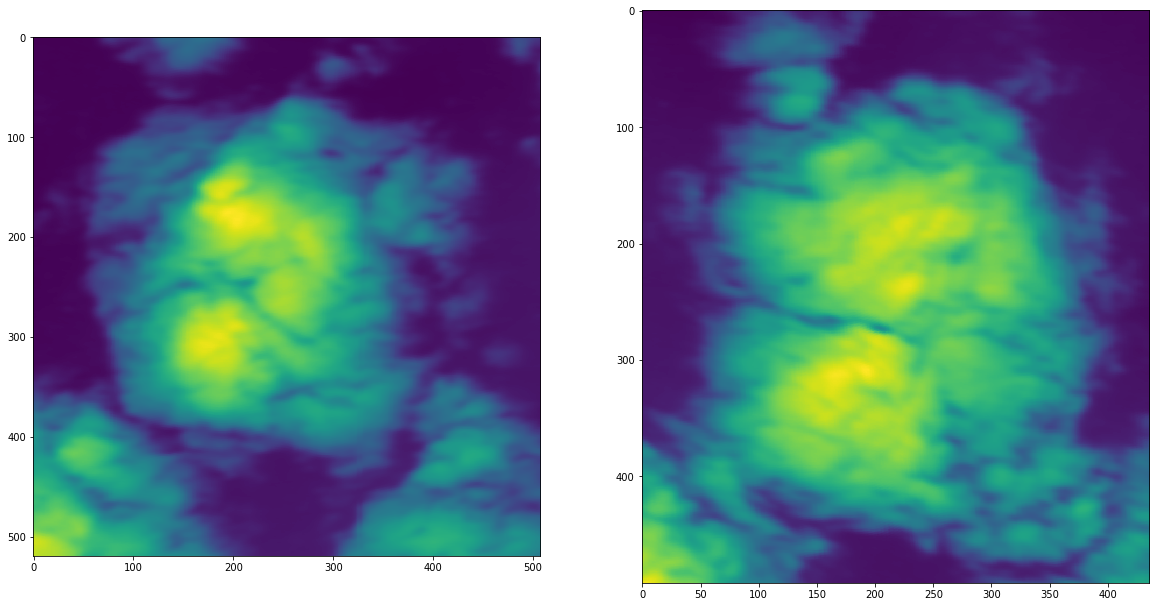

In [76]:
%matplotlib inline
f, axarr = plt.subplots(1, len(airmspi_measurements.images), figsize=(20, 20))
if isinstance(axarr,plt.Axes):
    axarr = [axarr]
for ax, image in zip(axarr, airmspi_measurements.images):
    if len(image.shape)>2 and image.shape[2]==2:
        image = np.concatenate((np.zeros((200,200,1)),image),2)
    # image -= image.min()
    # ax.imshow(image/image.max())
    ax.imshow(image)

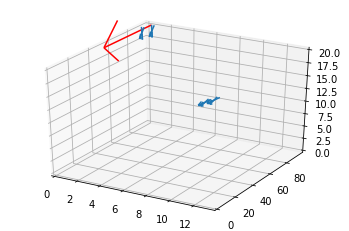

In [77]:
%matplotlib inline
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.view_init()
x_min = airmspi_measurements.camera.projection.x.min()
x_max = airmspi_measurements.camera.projection.x.max()
y_min = airmspi_measurements.camera.projection.y.min()
y_max = airmspi_measurements.camera.projection.y.max()
airmspi_measurements.plot(ax,[x_min, x_max],[y_min, y_max],[0, 20],5)

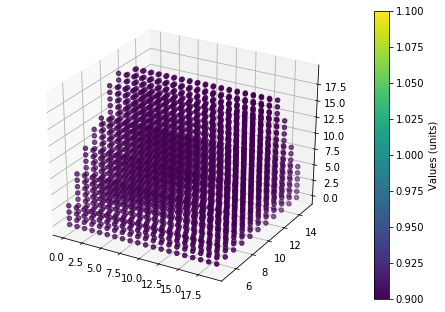

2908


In [78]:
nx = 20
ny = 20
x_min = 0
x_max = 5
dx = np.round((x_max-x_min)/nx,10)
x = np.arange(x_min,x_max,dx)

y_min = 40
y_max = 50
dy = np.round((y_max-y_min)/ny,10)
y = np.arange(y_min,y_max,dy)

z = np.linspace(0, 1, 20)
grid = shdom.Grid(x=x,
                  y=y,z=z)

measurements = airmspi_measurements
carver = shdom.SpaceCarver(airmspi_measurements)
mask = carver.carve(grid, agreement=0.7, thresholds=0.01)
show_mask=1
if show_mask:
    a = (mask.data)
    shdom.cloud_plot(a)
    print(sum(sum(sum(a))))

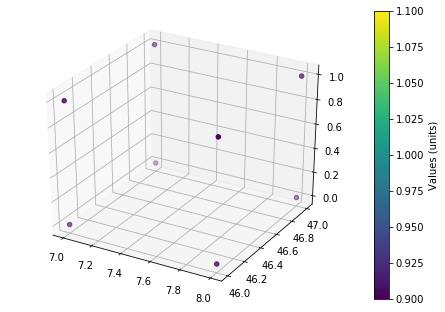

8


In [79]:
nz = 100
nx = ny = 100
x_min = 0
x_max = 50
dx = np.round((x_max-x_min)/nx,10)
x = np.arange(x_min,x_max,dx)

y_min = 0
y_max = 100
dy = np.round((y_max-y_min)/ny,10)
y = np.arange(y_min,y_max,dy)

z = np.linspace(0, 20, 20)
grid = shdom.Grid(x=x,
                  y=y,z=z)

images = airmspi_measurements.images.copy()
for i, image in enumerate(images):
    im = np.zeros(image.shape)
    im[int(nx),int(ny)] = 1
    airmspi_measurements._images[i] = im
carver = shdom.SpaceCarver(airmspi_measurements)
mask = carver.carve(grid, agreement=0.6, thresholds=0.01)
show_mask=1
if show_mask:
    a = (mask.data)
    shdom.cloud_plot(a)
    print(sum(sum(sum(a))))

In [80]:
def calccenterofmass(mask):
    data = mask.data
    mx = np.sum(np.sum(data,2),1)
    my = np.sum(np.sum(data,2),0)
    mz = np.sum(np.sum(data,0),0)
    com_x = sum(mx * mask.grid.x)/sum(mx)
    com_y = sum(my * mask.grid.y)/sum(my)
    com_z = sum(mz * mask.grid.z)/sum(mz)
    return com_x, com_y, com_z
print( calccenterofmass(mask_list[2]))
# for ind,im in enumerate(airmspi_measurements.images):
#     mask = np.ones(im.shape) * im.min()
#     mask[150:250,150:250] = im[150:250,150:250]
#     airmspi_measurements._images[ind] = mask

NameError: name 'mask_list' is not defined